<a href="https://colab.research.google.com/github/Integrall11/RNN-pyhthon-implementation/blob/main/Main%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, SimpleRNN, Dropout
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

Check if a simple fully connected neural network can predict a sequence of orderd 5 numbers

In [37]:
#create our dataset
X = np.array(range(1, 2001)).reshape(400, 5, 1)
y = np.array([5*x +1 for x in range(1, 401)]).reshape(400, 1)
test = np.array(range(3000, 3100)).reshape(20, 5, 1)
print('X =\n', X[:5])
print('y =\n', y[:5])
print('test =\n', test[:5])

X =
 [[[ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]]

 [[ 6]
  [ 7]
  [ 8]
  [ 9]
  [10]]

 [[11]
  [12]
  [13]
  [14]
  [15]]

 [[16]
  [17]
  [18]
  [19]
  [20]]

 [[21]
  [22]
  [23]
  [24]
  [25]]]
y =
 [[ 6]
 [11]
 [16]
 [21]
 [26]]
test =
 [[[3000]
  [3001]
  [3002]
  [3003]
  [3004]]

 [[3005]
  [3006]
  [3007]
  [3008]
  [3009]]

 [[3010]
  [3011]
  [3012]
  [3013]
  [3014]]

 [[3015]
  [3016]
  [3017]
  [3018]
  [3019]]

 [[3020]
  [3021]
  [3022]
  [3023]
  [3024]]]


In [38]:
#define function to dreate a simple fully connected layer
def creat_FC(hidden_layers, hidden_units=10, activation='linear'):
  model = Sequential()
  model.add(Dense(units=5, activation=activation))

  for _ in range(hidden_layers):
    model.add(Dense(units=hidden_units, activation=activation))
  
  model.add(Dense(units=3, activation=activation))
  model.add(Dense(units=1, activation='softmax'))
  model.compile(loss='mean_squared_error', optimizer='adam')

  return model

fc = creat_FC(5)
fc.fit(X, y, epochs=40, batch_size=1)

Epoch 1/40
400/400 [==============================] - 3s 1ms/step - loss: 1338337.5000
Epoch 2/40
400/400 [==============================] - 1s 1ms/step - loss: 1338337.5000
Epoch 3/40
400/400 [==============================] - 1s 2ms/step - loss: 1338337.5000
Epoch 4/40
400/400 [==============================] - 1s 1ms/step - loss: 1338337.3750
Epoch 5/40
400/400 [==============================] - 1s 2ms/step - loss: 1338337.2500
Epoch 6/40
400/400 [==============================] - 1s 2ms/step - loss: 1338337.6250
Epoch 7/40
400/400 [==============================] - 1s 1ms/step - loss: 1338337.6250
Epoch 8/40
400/400 [==============================] - 1s 1ms/step - loss: 1338337.6250
Epoch 9/40
400/400 [==============================] - 1s 1ms/step - loss: 1338337.6250
Epoch 10/40
400/400 [==============================] - 1s 2ms/step - loss: 1338337.6250
Epoch 11/40
400/400 [==============================] - 1s 2ms/step - loss: 1338337.5000
Epoch 12/40
400/400 [====================

In [39]:
#check the model performance on the test data
fc_predict = fc.predict(test)
fc_predict

1/1 [==============================] - 0s 403ms/step


array([[[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994]],

       [[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994]],

       [[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994]],

       [[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994]],

       [[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994]],

       [[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994]],

       [[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994]],

       [[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994]],

       [[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999

As it can be seen no matter how to tune the hyperparameters (batch_size, epochs, number of hidden layers or ativation function) a FC NN can not make predictions on a data with no higher representation or and linear relationship between each feature (first element of any 5 sequence are considered a features and the same for any seconde and third etc)
NoW we use a simple recurrent network and instead of feeding this 5 sequence as 5 features we feed as a sequence of one feature (a concept that is not defined in the simple neural networks with no memory)

In [5]:
#define a function to create RNN
def create_RNN(hidden_units, dense_units, input_shape, activation):
  model = Sequential()
  model.add(SimpleRNN(units=hidden_units, activation=activation[0], input_shape=input_shape))
  model.add(Dense(units=dense_units, activation=activation[1]))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

model = create_RNN(1, 1, (5, 1), ['linear', 'linear'])

In [6]:
#train the RNN model
model.fit(X, y, epochs=50, batch_size=1)

Epoch 1/50
400/400 [==============================] - 1s 1ms/step - loss: 1755557.5000
Epoch 2/50
400/400 [==============================] - 1s 1ms/step - loss: 52333.2695
Epoch 3/50
400/400 [==============================] - 1s 1ms/step - loss: 1.1640
Epoch 4/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0391
Epoch 5/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0391
Epoch 6/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0388
Epoch 7/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0389
Epoch 8/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0388
Epoch 9/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0383
Epoch 10/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0379
Epoch 11/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0371
Epoch 12/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0369
Epoch 13/50
400

In [7]:
#print trained weight
weights = model.get_weights()
print('wx =\n', weights[0])
print('wh = \n', weights[1])
print('bh =\n', weights[2])
print('wy = \n', weights[3])
print('by = \n', weights[4])

wx =
 [[-0.13516094]]
wh = 
 [[1.0098999]]
bh =
 [-0.3474022]
wy = 
 [[-1.4506035]]
by = 
 [0.3554195]


In [8]:
#test the model on a new data
model.predict(test)

1/1 [==============================] - 0s 144ms/step


array([[3004.6895],
       [3009.689 ],
       [3014.6887],
       [3019.6882],
       [3024.688 ],
       [3029.6877],
       [3034.6873],
       [3039.6868],
       [3044.6865],
       [3049.6863],
       [3054.6858],
       [3059.6853],
       [3064.6848],
       [3069.6848],
       [3074.6843],
       [3079.6843],
       [3084.6838],
       [3089.6833],
       [3094.6833],
       [3099.6824]], dtype=float32)

If we play wiht different hyperparamters it can be seen that a simpler RNN with fewer ruccurent units actually performs better. we can also try different activation fuctions. Linear is fine

In [69]:
#get data and split it into train and test
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'

def get_train_test(url, test_size=0.2): 
  df = pd.read_csv(url, usecols=[1], engine='python')
  data = df.values.astype('float32')
  scaler = MinMaxScaler(feature_range=(0, 1))
  data = scaler.fit_transform(data)
  train, test = train_test_split(data, test_size=test_size, shuffle=False)
  return train, test

train, test = get_train_test(url)

In [83]:
#get X and y for train and test data
def get_XY(data, timeStep):  
  y_idx = np.arange(timeStep, data.shape[0], timeStep)
  y = data[y_idx]
  X = data[:timeStep*y.shape[0]]
  X = X.reshape(-1, timeStep, 1)
  return X, y

X_train, y_train = get_XY(train, 12)
X_test, y_test = get_XY(test, 12)
print(f'X_train shape = {X_train.shape}; X_test shape = {X_test.shape}; y_train shape = {y_train.shape}; y_test shape = {y_test.shape}')

X_train shape = (187, 12, 1); X_test shape = (46, 12, 1); y_train shape = (187, 1); y_test shape = (46, 1)


In [108]:
#define a function to train, test and visulize the model to play with different parameters more easily
def train_test_vis(rnn_units, X_train, y_train, X_test, y_test, rnn_activation='linear', dense_activation='linear', epochs=40, batch_size=1, verbose=0):
  model = create_RNN(rnn_units, 1, (12, 1), [rnn_activation, dense_activation])
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
  test_pred = model.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
  print(f'test RMSE = {RMSE}')
  plt.figure(figsize=(5, 3))
  plt.plot(range(y_test.shape[0]), y_test, label='test data')
  plt.plot(range(y_test.shape[0]), test_pred, label='predicted')
  plt.legend()
  plt.show()
  return RMSE, test_pred

2/2 [==============================] - 0s 7ms/step
test RMSE = 0.07564448565244675


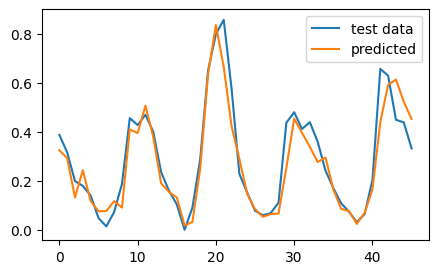

RMSE = 0.07564448565244675


In [109]:
RMSE, prdictions = train_test_vis(1, X_train, y_train, X_test, y_test, rnn_activation='linear', dense_activation='linear')
print(f'RMSE = {RMSE}')

2/2 [==============================] - 0s 16ms/step
test RMSE = 0.07467079162597656


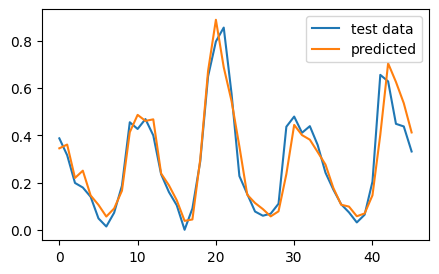

RMSE = 0.07467079162597656


In [110]:
RMSE, prdictions = train_test_vis(4, X_train, y_train, X_test, y_test)
print(f'RMSE = {RMSE}')

2/2 [==============================] - 0s 4ms/step
test RMSE = 0.07737685739994049


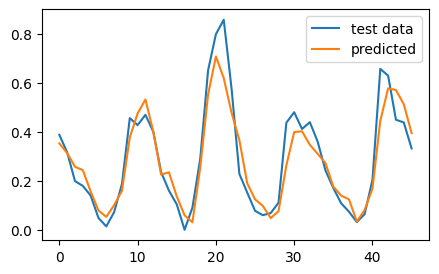

RMSE = 0.07737685739994049


In [111]:
RMSE, prdictions = train_test_vis(32, X_train, y_train, X_test, y_test, epochs=100, rnn_activation='tanh', dense_activation='tanh')
print(f'RMSE = {RMSE}')

After trying different parameters it does seem that tanh and linear activation function doesn't differ that much and more rnn units seem to deliver more consitent (and lower loss) results but the difference is negligible